In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

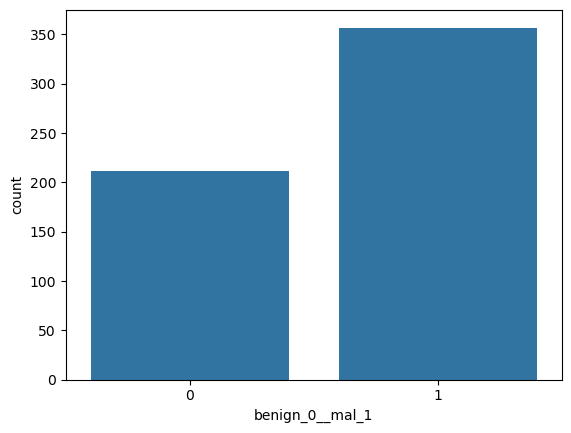

In [19]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

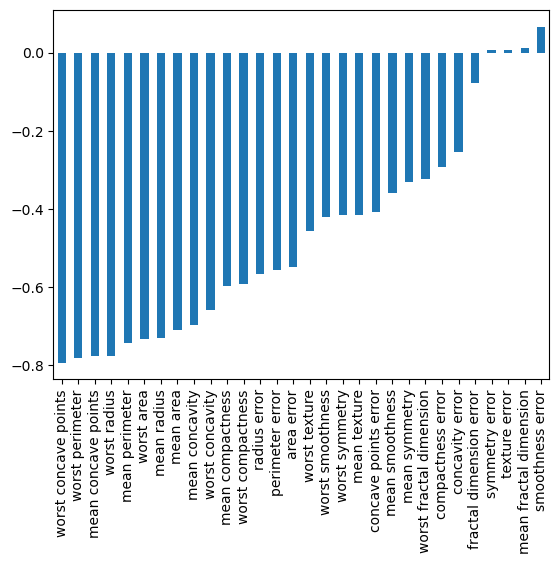

In [29]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

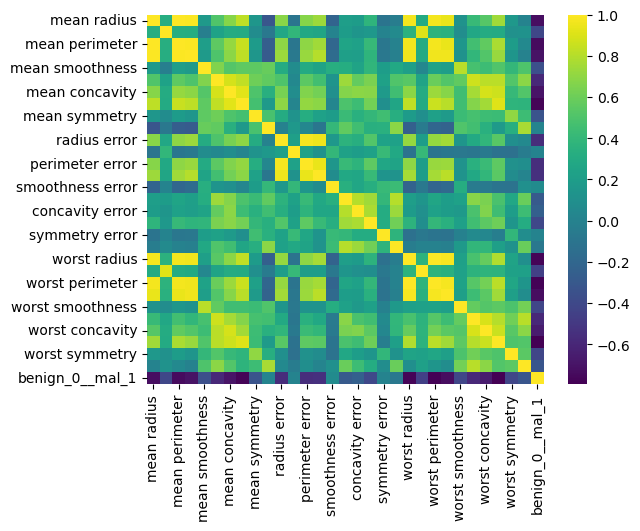

In [39]:
sns.heatmap(df.corr(),cmap='viridis')

In [43]:
x=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

In [53]:
x_train=scaler.fit_transform(x_train)

In [55]:
x_test=scaler.transform(x_test)

In [59]:
from tensorflow.keras.models import Sequential

In [61]:
from tensorflow.keras.layers import Dense,Dropout

In [65]:
x_train.shape

(398, 30)

In [71]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary Classification

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [73]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7476 - val_loss: 0.6819
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6697 - val_loss: 0.6496
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6554 - val_loss: 0.6188
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6166 - val_loss: 0.5858
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5949 - val_loss: 0.5431
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5401 - val_loss: 0.4960
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5144 - val_loss: 0.4467
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4600 - val_loss: 0.3980
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4084 - val_loss: 0.3545
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3810 - val_loss: 0.3189
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3263 - val_loss: 0.2908
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [75]:
losses=pd.DataFrame(model.history.history)

<Axes: >

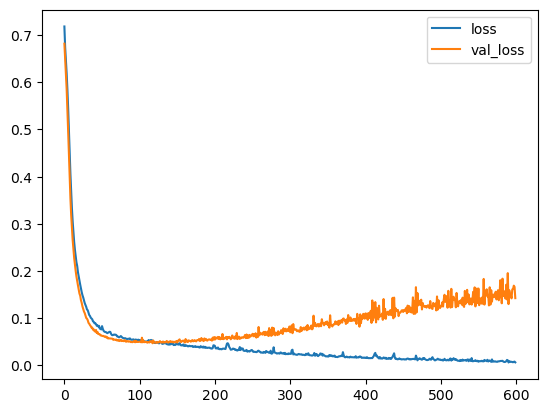

In [79]:
losses.plot()

In [81]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary Classification

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |
 |  Stop training when a monitored metric has stopped improving.
 |
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |
 |  Args:
 |      monitor: Quantity to be monitored. Defaults to `"val

In [91]:
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [93]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6917 - val_loss: 0.6625
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6549 - val_loss: 0.6228
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6189 - val_loss: 0.5812
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5807 - val_loss: 0.5346
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5345 - val_loss: 0.4801
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4788 - val_loss: 0.4243
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4403 - val_loss: 0.3744
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3743 - val_loss: 0.3281
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3560 - val_loss: 0.2905
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2920 - val_loss: 0.2590
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2554 - val_loss: 0.2340
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2

In [95]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

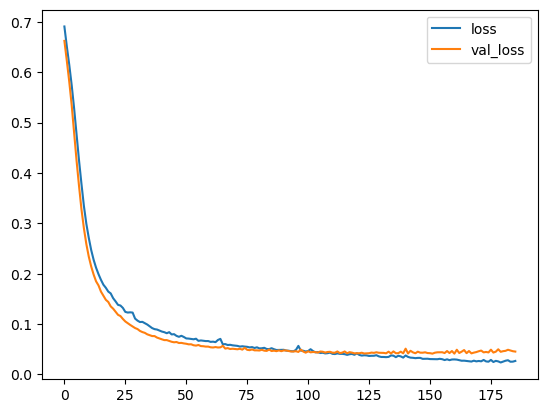

In [99]:
model_loss.plot()

In [101]:
from tensorflow.keras.layers import Dropout

In [105]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary Classification

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [107]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7407 - val_loss: 0.6744
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6816 - val_loss: 0.6512
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7070 - val_loss: 0.6293
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6510 - val_loss: 0.6104
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6601 - val_loss: 0.5900
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6331 - val_loss: 0.5677
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6069 - val_loss: 0.5454
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5911 - val_loss: 0.5223
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5681 - val_loss: 0.4968
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5555 - val_loss: 0.4738
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5278 - val_loss: 0.4481
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5

In [109]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

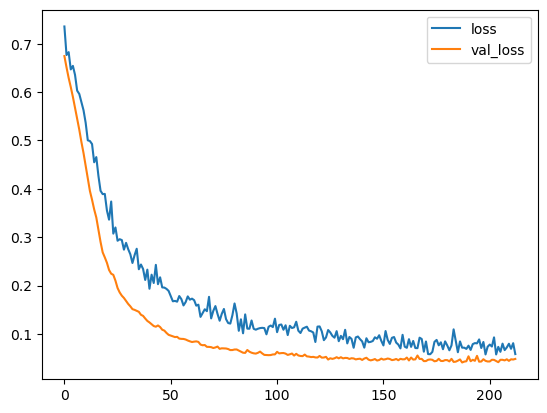

In [111]:
model_loss.plot()

In [141]:
pre=model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [143]:
from sklearn.metrics import classification_report,confusion_matrix

In [160]:
#print(classification_report(y_test,pre))
#print('\n')
#print(confusion_matrix(y_test,pre))

In [162]:
#Project Exercise

In [4]:
import pandas as pd

In [6]:
data_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
data_info
                      

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [8]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [10]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [12]:
feat_info('mort_acc')

Number of mortgage accounts.


In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df=pd.read_csv('lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [15]:
sns.countplot(x='loan_status',data=df)

<Axes: xlabel='loan_status', ylabel='count'>

/var/folders/cx/wmcp9v4x4j127zyy_tykn31w0000gn/T/ipykernel_859/2022642379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


(0.0, 45000.0)

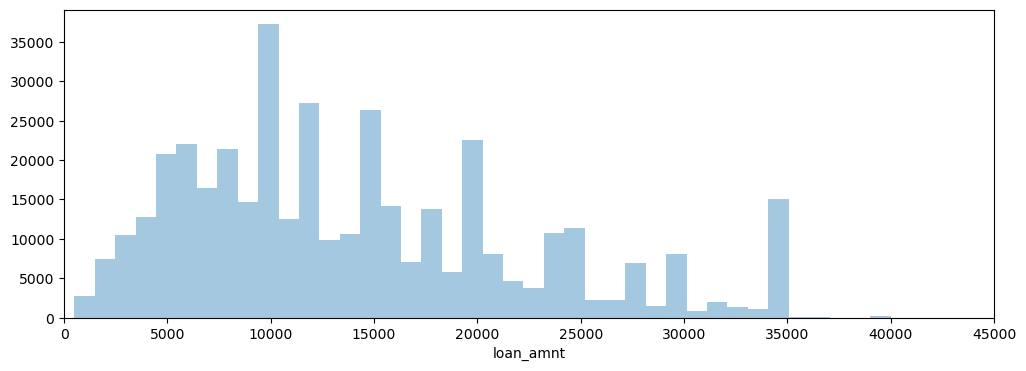

In [28]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

In [34]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

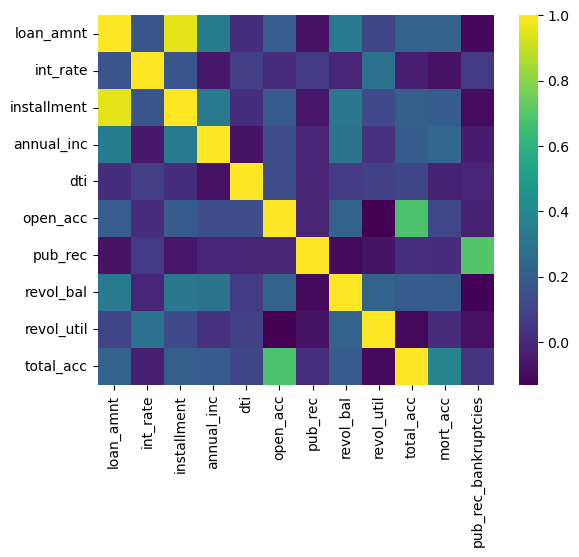

In [40]:
sns.heatmap(df.corr(numeric_only=True),annot=False,cmap='viridis')
plt.ylim(10,0)

In [42]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

In [ ]:
sns.boxplot(x='installment',y='loan_amnt',data=df)

In [ ]:
df.groupby('installment')['loan_amnt'].decribe()